## <b> Bitcoin Analysis </b>

"Crypto has proven not to be a diversifying asset! Its not a safe heaven."


In [2]:
# Packages used
from datetime import datetime, date
import pandas as pd
import pandas_datareader as web
import numpy as np
import matplotlib.pyplot as plt
import mplfinance as mpf
import seaborn as sns
from math import sqrt


The largest economies of the world were challenged during the COVID-19 pandemic. Because of lockdowns, companies had to shutdown their operations or send many of their workers home. That resulted in a massive unemployment rate and a economic fallout that was never seen before.

In order to stimulate the economy, the Central Banks around the world adopted a loose monetary policy. Interest rates were reduced to record lows and many countries literally printed money to help their people, who couldn't go to work or were unemployed at that time.

During lockdowns, poeple were desperate to find new alternatives to generate income. One way people found interesting was trading stocks and cryptocurrencies.

In [3]:
stocks_crypto_trend = pd.read_csv("stocks_and_crypto.csv").set_index("Week")

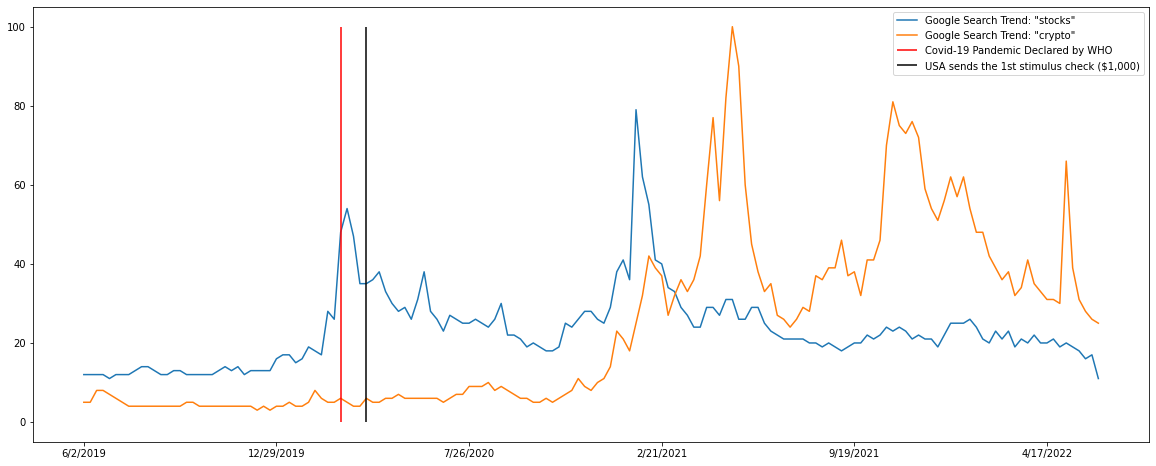

In [4]:
# Plotting Google Trends Data
fig, ax = plt.subplots(figsize=(20,8))

# Setting the plot data
ax.plot(stocks_crypto_trend['stocks'], label='Google Search Trend: "stocks"')
ax.plot(stocks_crypto_trend['crypto'], label = 'Google Search Trend: "crypto"')
ax.vlines(stocks_crypto_trend.index.to_frame().loc['3/8/2020'], ymax=100, ymin=0, color= 'red', label="Covid-19 Pandemic Declared by WHO", linestyle='solid')
ax.vlines(stocks_crypto_trend.index.to_frame().loc['4/5/2020'], ymax=100, ymin=0, color= 'black', label="USA sends the 1st stimulus check ($1,000)", linestyle='solid')

# Formatting the plot
plt.xticks(np.arange(0, len(stocks_crypto_trend['stocks'])+1, 30))
plt.legend()
None

Google Trends shows how frequently a given search term is entered into Google's search. It ranges from  0 to 100, where 0 shows the lowest volume in searches and 100 shows the highest volume in searches.


The chart above shows the search trend for the words "stocks" and "crypto".

The World Health Organization declared COVID-19 as pandamic in March 11th and we can see in the chart the first sign of people looking for alternative ways of income. 
In addition, even though the interest for stocks during the first days of the COVID-19 outbreak, people didn't look very confortable to spend their money on risky assets since Stocks and Bitcoin were getting during that period. 

In [5]:
## Price data 2020

# Bicoin price data (During Pandemic)
btc_usd_pandemic = web.DataReader('BTC-USD', data_source='yahoo', start='2019-06-23', end='2020-06-08')['Adj Close'].to_frame().rename(columns={'Adj Close': 'BTCUSD'})

# SP500 price data (During Pandemic)
sp500_pandemic = web.DataReader('^GSPC', data_source='yahoo', start='2019-06-23', end='2020-06-08')['Adj Close'].to_frame().rename(columns={'Adj Close': 'SP500'})

# NASDAQ 100 price data (During Pandemic)
nasdaq_pandemic = web.DataReader('^IXIC', data_source='yahoo', start='2019-06-23', end='2020-06-08')['Adj Close'].to_frame().rename(columns={'Adj Close': 'NASDAQ100'})

# Prices dataframe
pandemic_df = pd.DataFrame([btc_usd_pandemic['BTCUSD'], sp500_pandemic['SP500'], nasdaq_pandemic['NASDAQ100']]).transpose().dropna()

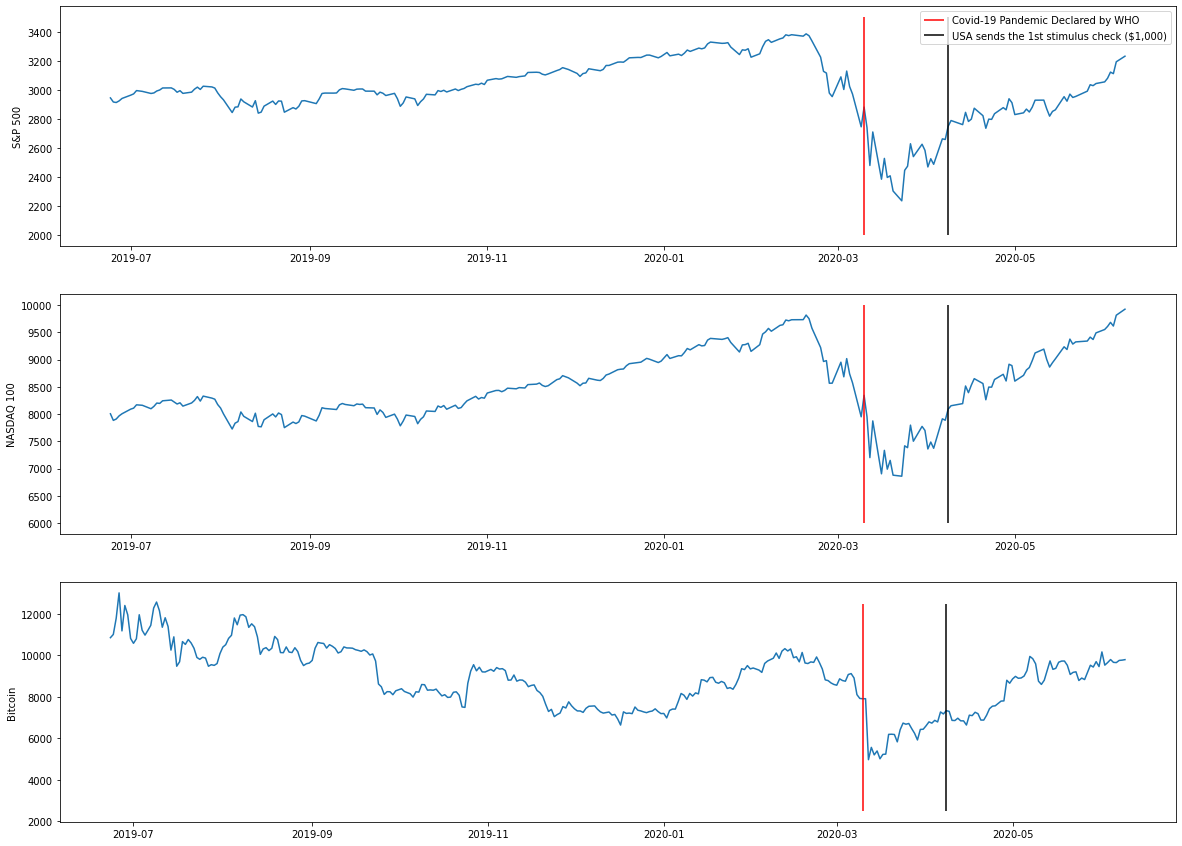

In [6]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(20,15))

# SP 500
ax1.plot(sp500_pandemic)
ax1.vlines(sp500_pandemic.index.to_frame().loc['3/10/2020'], ymax=3500, ymin=2000, color= 'red', label="Covid-19 Pandemic Declared by WHO", linestyle='solid')
ax1.vlines(sp500_pandemic.index.to_frame().loc['4/8/2020'], ymax=3500, ymin=2000, color= 'black', label="USA sends the 1st stimulus check ($1,000)", linestyle='solid')
ax1.legend()
ax1.set_ylabel("S&P 500")

# NASDAQ 100
ax2.plot(nasdaq_pandemic)
ax2.vlines(nasdaq_pandemic.index.to_frame().loc['3/10/2020'], ymax=10000, ymin=6000, color= 'red', label="Covid-19 Pandemic Declared by WHO", linestyle='solid')
ax2.vlines(nasdaq_pandemic.index.to_frame().loc['4/8/2020'], ymax=10000, ymin=6000, color= 'black', label="USA sends the 1st stimulus check ($1,000)", linestyle='solid')
ax2.set_ylabel("NASDAQ 100")

# Bitcoin
ax3.plot(btc_usd_pandemic)
ax3.vlines(btc_usd_pandemic.index.to_frame().loc['3/10/2020'], ymax=12500, ymin=2500, color= 'red', label="Covid-19 Pandemic Declared by WHO", linestyle='solid')
ax3.vlines(btc_usd_pandemic.index.to_frame().loc['4/8/2020'], ymax=12500, ymin=2500, color= 'black', label="USA sends the 1st stimulus check ($1,000)", linestyle='solid')
ax3.set_ylabel("Bitcoin")

None

It is important to remember that there was now way to know if risky assets were going to recover or were heading down during that time. 

People were still scared about the massive declines in prices they experienced during the beginning pandemic. 

We can see the Drawdown for each asset below:

In [25]:
for asset in pandemic_df.columns:
    print(f'The Drawdown for {asset} during the pandemic was: {format(((min(pandemic_df[asset]) / max(pandemic_df[asset]))-1)*100,".2f")}%')

The Drawdown for BTCUSD during the pandemic was: -61.81%
The Drawdown for SP500 during the pandemic was: -33.92%
The Drawdown for NASDAQ100 during the pandemic was: -30.87%


However, people's behavior towards risk changed after they received the second and third stimulus check.


As people realized that governments around the world, specially the U.S., were printing and distributing so much money, people started to look for risky investments. 

In the plot below, we can see that search trend for stocks reached all time high after people received their second stimulus check. The search trend for "crypto" were also trending higher, but not as much as stocks.

However, after people received their third stimulus check. The search trend for "crypto" exploded higher. The search frequency for crypto after the stimulus third check was higher than the frequency for stocks after the second stimulus check. As we can see below.

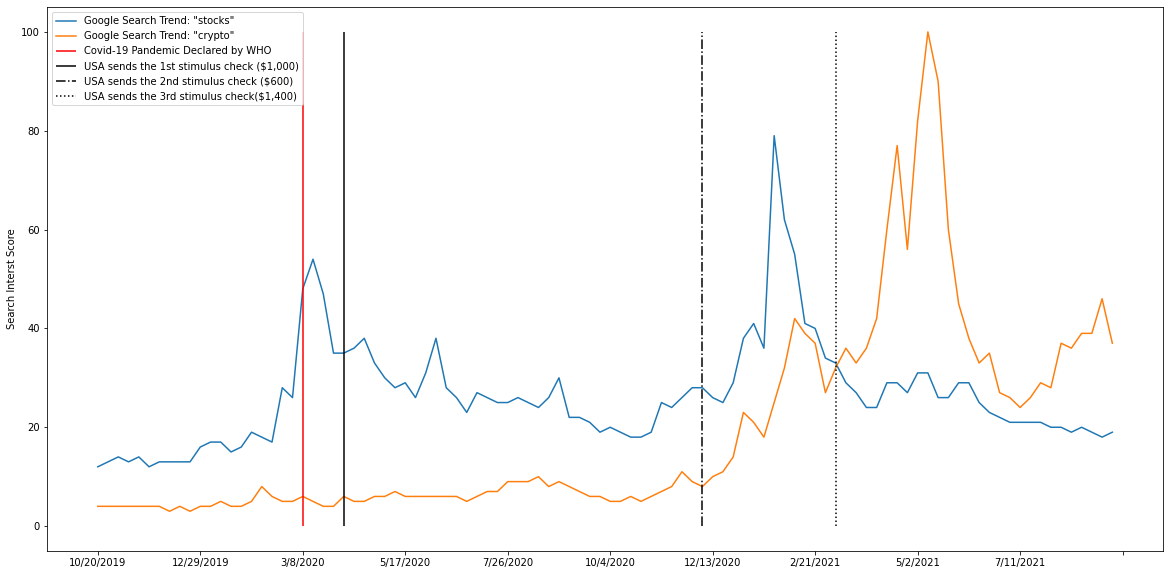

In [8]:
# Plotting Google Trends Data
fig, ax = plt.subplots(figsize=(20,10))

# Setting the plot data
ax.plot(stocks_crypto_trend['stocks'][20:120], label='Google Search Trend: "stocks"')
ax.plot(stocks_crypto_trend['crypto'][20:120], label = 'Google Search Trend: "crypto"')
ax.vlines(stocks_crypto_trend.index.to_frame().loc['3/8/2020'], ymax=100, ymin=0, color= 'red', label="Covid-19 Pandemic Declared by WHO", linestyle='solid')
ax.vlines(stocks_crypto_trend.index.to_frame().loc['4/5/2020'], ymax=100, ymin=0, color= 'black', label="USA sends the 1st stimulus check ($1,000)", linestyle='solid')
ax.vlines(stocks_crypto_trend.index.to_frame().loc['12/6/2020'], ymax=100, ymin=0, color= 'black', label="USA sends the 2nd stimulus check ($600)", linestyle='dashdot')
ax.vlines(stocks_crypto_trend.index.to_frame().loc['3/7/2021'], ymax=100, ymin=0, color= 'black', label="USA sends the 3rd stimulus check($1,400)", linestyle='dotted')
ax.set_ylabel("Search Interst Score")

# Formatting the plot
plt.xticks(np.arange(0, len(stocks_crypto_trend.index[20:120])+1, 10))
plt.legend()
None

Analyzing this data makes it clear that people were looking for risky assets. However, it also raises the following question: <b> Why people were so interested in cryptocurrencies? </b>

# Understanding the interest behind Bitcoin and other cryptocurrencies

### Price Analysis
It is totally understandable that people would like to increase the risk of their portfolio during periods of easy money. 

However, that might not be the only reason people invested in Bitcoin and other cryptocurrencies.

To have a deep understanding of that interest, let's take a look at the price chart for stocks and bitcoin one year after the pandemic.

In [16]:
## Price data - One year after pandemic

# Bicoin price data (During Pandemic)
btc_usd_pandemic_2nd = web.DataReader('BTC-USD', data_source='yahoo', start='2020-02-23', end='2021-04-08')['Adj Close'].to_frame().rename(columns={'Adj Close': 'BTCUSD'})

# SP500 price data (During Pandemic)
sp500_pandemic_2nd = web.DataReader('^GSPC', data_source='yahoo', start='2020-02-23', end='2021-04-08')['Adj Close'].to_frame().rename(columns={'Adj Close': 'SP500'})

# NASDAQ 100 price data (During Pandemic)
nasdaq_pandemic_2nd = web.DataReader('^IXIC', data_source='yahoo', start='2020-02-23', end='2021-04-08')['Adj Close'].to_frame().rename(columns={'Adj Close': 'NASDAQ100'})

# Prices dataframe
post_pandemic_df = pd.DataFrame([btc_usd_pandemic_2nd['BTCUSD'], sp500_pandemic_2nd['SP500'], nasdaq_pandemic_2nd['NASDAQ100']]).transpose().dropna()

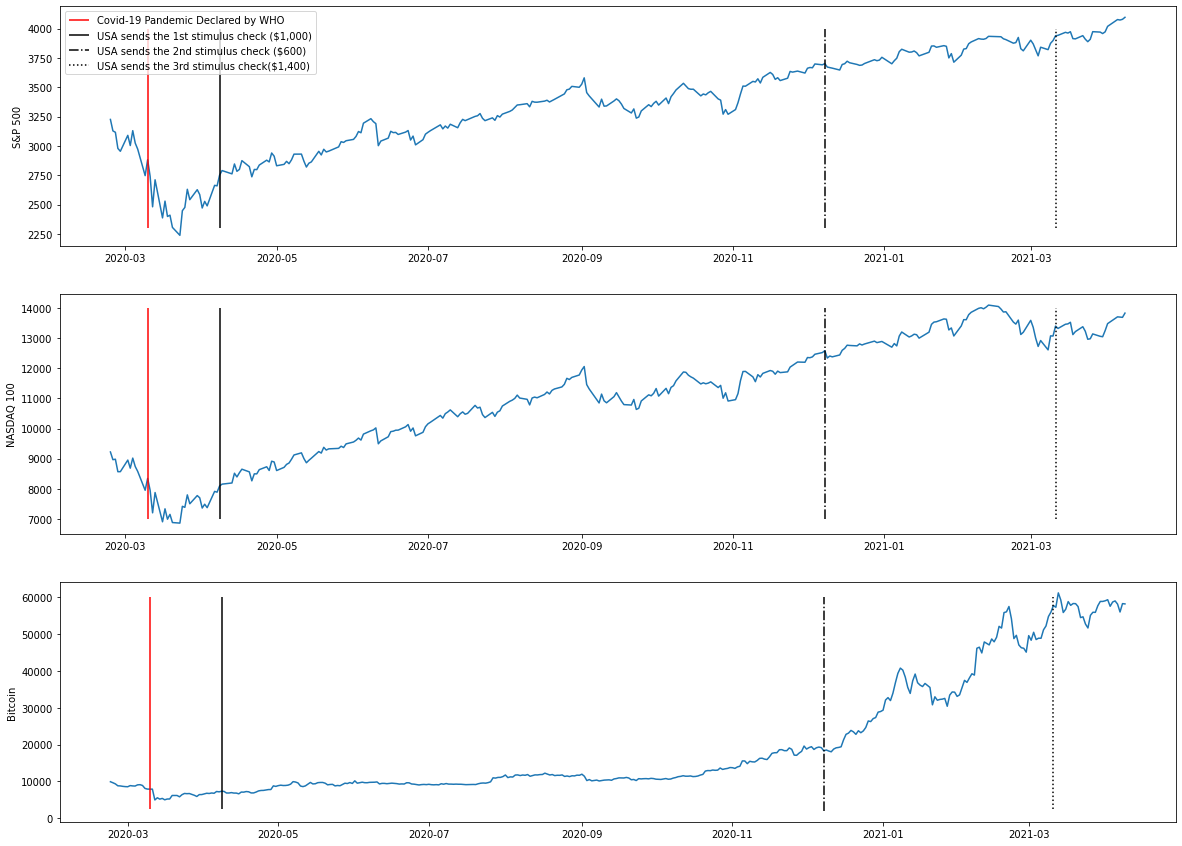

In [109]:
# Price data plot
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(20,15))

# SP 500
ax1.plot(sp500_pandemic_2nd)
ax1.vlines(sp500_pandemic_2nd.index.to_frame().loc['3/10/2020'], ymax=4000, ymin=2300, color= 'red', label="Covid-19 Pandemic Declared by WHO", linestyle='solid')
ax1.vlines(sp500_pandemic_2nd.index.to_frame().loc['4/8/2020'], ymax=4000, ymin=2300, color= 'black', label="USA sends the 1st stimulus check ($1,000)", linestyle='solid')
ax1.vlines(sp500_pandemic_2nd.index.to_frame().loc['12/8/2020'], ymax=4000, ymin=2300, color= 'black', label="USA sends the 2nd stimulus check ($600)", linestyle='dashdot')
ax1.vlines(sp500_pandemic_2nd.index.to_frame().loc['3/11/2021'], ymax=4000, ymin=2300, color= 'black', label="USA sends the 3rd stimulus check($1,400)", linestyle='dotted')
ax1.legend()
ax1.set_ylabel("S&P 500")

# NASDAQ 100
ax2.plot(nasdaq_pandemic_2nd)
ax2.vlines(nasdaq_pandemic_2nd.index.to_frame().loc['3/10/2020'], ymax=14000, ymin=7000, color= 'red', label="Covid-19 Pandemic Declared by WHO", linestyle='solid')
ax2.vlines(nasdaq_pandemic_2nd.index.to_frame().loc['4/8/2020'], ymax=14000, ymin=7000, color= 'black', label="USA sends the 1st stimulus check ($1,000)", linestyle='solid')
ax2.vlines(nasdaq_pandemic_2nd.index.to_frame().loc['12/8/2020'], ymax=14000, ymin=7000, color= 'black', label="USA sends the 2nd stimulus check ($600)", linestyle='dashdot')
ax2.vlines(nasdaq_pandemic_2nd.index.to_frame().loc['3/11/2021'], ymax=14000, ymin=7000, color= 'black', label="USA sends the 3rd stimulus check($1,400)", linestyle='dotted')
ax2.set_ylabel("NASDAQ 100")

# Bitcoin
ax3.plot(btc_usd_pandemic_2nd)
ax3.vlines(btc_usd_pandemic_2nd.index.to_frame().loc['3/10/2020'], ymax=60000, ymin=2500, color= 'red', label="Covid-19 Pandemic Declared by WHO", linestyle='solid')
ax3.vlines(btc_usd_pandemic_2nd.index.to_frame().loc['4/8/2020'], ymax=60000, ymin=2500, color= 'black', label="USA sends the 1st stimulus check ($1,000)", linestyle='solid')
ax3.vlines(btc_usd_pandemic_2nd.index.to_frame().loc['12/8/2020'], ymax=60000, ymin=2000, color= 'black', label="USA sends the 2nd stimulus check ($600)", linestyle='dashdot')
ax3.vlines(btc_usd_pandemic_2nd.index.to_frame().loc['3/11/2021'], ymax=60000, ymin=2500, color= 'black', label="USA sends the 3rd stimulus check($1,400)", linestyle='dotted')
ax3.set_ylabel("Bitcoin")

None

Performance breakdown

In [38]:
for asset in post_pandemic_df.columns:
    print(f'Performance for {asset} from pandemic lows to the 2nd stimulus check: {format(((post_pandemic_df[asset].loc["12/8/2020"] / post_pandemic_df[asset].min())-1) * 100, ".2f")} %')

Performance for BTCUSD from pandemic lows until 2nd stimulus check: 268.58 %
Performance for SP500 from pandemic lows until 2nd stimulus check: 65.47 %
Performance for NASDAQ100 from pandemic lows until 2nd stimulus check: 83.40 %


In [43]:
for asset in post_pandemic_df.columns:
        print(f'Performance for {asset} from the 2nd stimuls to the 3rd stimulus check: {format(((post_pandemic_df[asset].loc["3/11/2021"] / post_pandemic_df[asset].loc["12/8/2020"])-1) * 100, ".2f")} %')

Performance for BTCUSD from the 2nd stimuls to the 3rd stimulus check: 215.51 %
Performance for SP500 from the 2nd stimuls to the 3rd stimulus check: 6.40 %
Performance for NASDAQ100 from the 2nd stimuls to the 3rd stimulus check: 6.48 %


In [40]:
for asset in post_pandemic_df.columns:
    print(f'Performance for {asset} from pandemic lows to the 3rd stimulus check: {format(((post_pandemic_df[asset].loc["3/11/2021"] / post_pandemic_df[asset].min())-1) * 100, ".2f")} %')

Performance for BTCUSD from pandemic lows to the 3rd stimulus check: 1062.90 %
Performance for SP500 from pandemic lows to the 3rd stimulus check: 76.07 %
Performance for NASDAQ100 from pandemic lows to the 3rd stimulus check: 95.30 %


As we can see, all risky assets had a great performance from the pandemic lows until people started receiving the 2nd stimulus check. Bitcoin was the best performer and this is understandable since it is way more volatile than stocks.

However, take a look at the performance differences from the 2nd stimulus check to the 3rd stimulus check. In addition, pay attention to the accumulated performance differences from pandemic lows to the third stimulus check. 

After analyzing these numbers, we can identify the signs of euphoria in the crypto markets where prices are not aligned to the fundamentals of a security or asset.

### The Fear of Missing Out (FOMO) Effect

There is an famous quote in the markets that is often attributed to Mark Twain

<b> "History does not repeat itself, but it rhymes." </b>

The FOMO effect we are seeing now has happened before with NASDAQ, event that is known by "The DotCom Bubble"

Back in late 90s and early 2000s, technology stocks soared higher with the thesis that the internet would be the future of the society. 
That thesis has proven to be true years later. However, the majority of people who invested in technology stocks during that period of euphoria went broke by late 2002 when tech stocks finally reversed the down trend.

Back then, investors saw impressive stock movements upwards. The majority of IPOs were from new technology companies that didn't even generate revenue and people were becoming millionaries so fast that it was hard to hold the emotions and not pour money on technology stocks. 

I need to ask to the reader. Does that sounds familiar to you? 

Let's go over some data

### Cryptomarkets vs DotCom Bubble

One characteristc of the DotCom Bubble was the sudden creation of new technology stocks that didn't have anything other than a powerpoint presentation.

According to CoinMarketCap, the number of LISTED cryptocurrencies went from 2028 in 2020 to 10263 coins in March, 2022. 

In [102]:
# Number of cryptocurrencies per yaer
years = [2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
quantity = [7, 67, 501, 572, 636, 1359, 2086, 2403, 4154, 10363]
num_listed_cryptos = pd.DataFrame([years, quantity]).transpose()
num_listed_cryptos.columns = ['Year', 'Number']
num_listed_cryptos = num_listed_cryptos.set_index('Year')

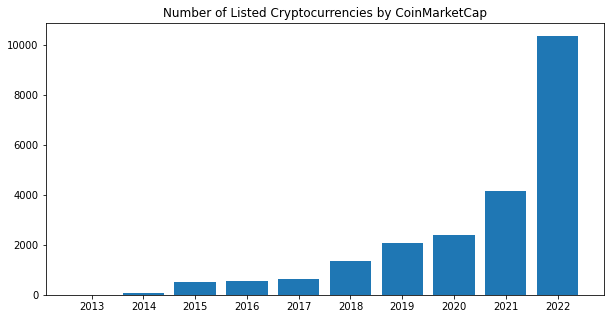

In [101]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(num_listed_cryptos.index, num_listed_cryptos['Number'])
ax.set_title("Number of Listed Cryptocurrencies by CoinMarketCap")
plt.xticks(years)
None

The vast majority of those coins does not have any real functionality, but it seems that this is not an issue for crypto investors. 

What seems to be driving investors to pour their money on cryptocurrency is the hope that they will easily become millionaires. In other words, these investors are now greedy enough to pour their money on whatever coin is trending on social media.

Elon Musk's tweets, for example,  had a huge impact on Bitcoin and Dogecoin prices.


In [130]:
# Bicoin price data (During Pandemic)
btc_usd_fomo = web.DataReader('BTC-USD', data_source='yahoo', start='2020-02-23', end='2021-07-08')['Adj Close'].to_frame().rename(columns={'Adj Close': 'BTCUSD'})
doge_usd_fomo = web.DataReader('DOGE-USD', data_source='yahoo', start='2020-02-23', end='2021-07-08')['Adj Close'].to_frame().rename(columns={'Adj Close': 'BTCUSD'})

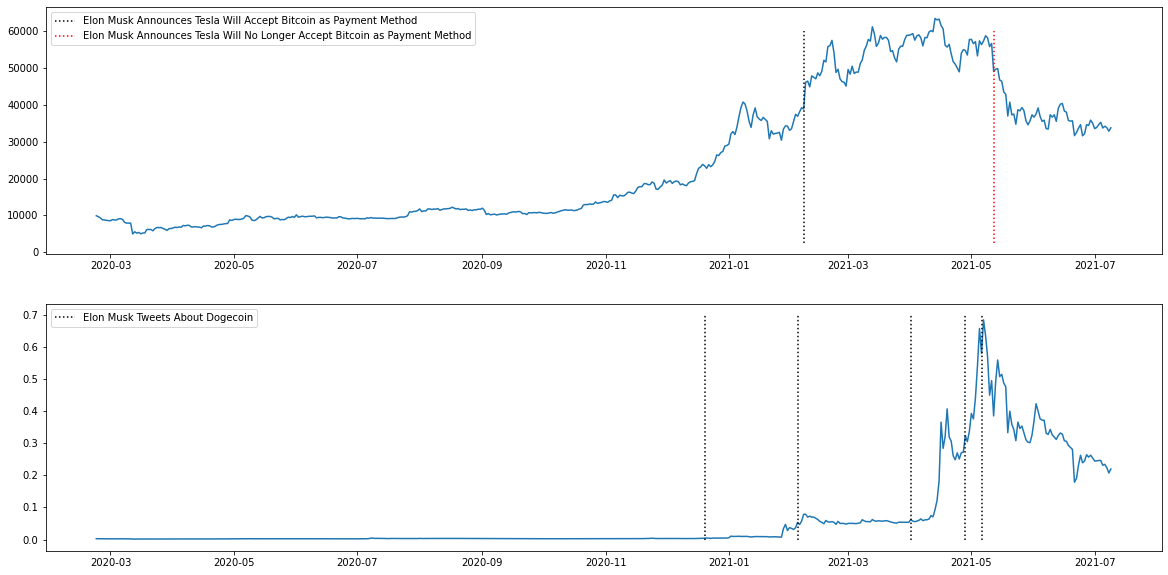

In [157]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 10))

ax1.plot(btc_usd_fomo)
ax1.vlines(btc_usd_fomo.index.to_frame().loc['2/7/2021'], 
        ymax=60000, ymin=2500,
        color= 'black', 
        label="Elon Musk Announces Tesla Will Accept Bitcoin as Payment Method", 
        linestyle='dotted') 
ax1.vlines(btc_usd_fomo.index.to_frame().loc['5/12/2021'], 
        ymax=60000, ymin=2500, 
        color= 'red', label="Elon Musk Announces Tesla Will No Longer Accept Bitcoin as Payment Method", 
        linestyle='dotted')
ax1.legend() 



ax2.plot(doge_usd_fomo)
ax2.vlines(doge_usd_fomo.index.to_frame().loc['12/20/2020'], ymax=0.7, ymin=0, color= 'black', label="Elon Musk Tweets About Dogecoin", linestyle='dotted')
ax2.vlines(doge_usd_fomo.index.to_frame().loc['2/4/2021'], ymax=0.7, ymin=0, color= 'black', linestyle='dotted')
ax2.vlines(doge_usd_fomo.index.to_frame().loc['4/1/2021'], ymax=0.7, ymin=0, color= 'black', linestyle='dotted')
ax2.vlines(doge_usd_fomo.index.to_frame().loc['4/28/2021'], ymax=0.7, ymin=0, color= 'black', linestyle='dotted')
ax2.vlines(doge_usd_fomo.index.to_frame().loc['5/6/2021'], ymax=0.7, ymin=0, color= 'black', linestyle='dotted')
ax2.legend()

None

In [164]:
(btc_usd_fomo.max()/btc_usd_fomo.loc['2/7/2021']) - 1

BTCUSD    0.632335
dtype: float64